# Descriptive Statistics, Generator Practice

GISS Temp Data:

* [home](https://data.giss.nasa.gov/gistemp/)
* [as text file](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.txt)
* [as csv](https://data.giss.nasa.gov/gistemp/tabledata_v4/GLB.Ts+dSST.csv)
* [faq (why anomaly rather than absolute temp)](https://data.giss.nasa.gov/gistemp/faq/)
* [absolute varies in short distance](https://data.giss.nasa.gov/gistemp/faq/abs_temp.html)
* [example plot](https://data.giss.nasa.gov/gistemp/faq/)

1. discuss line graphs
2. discuss scatter plots
3. best fit line





(0, 12)

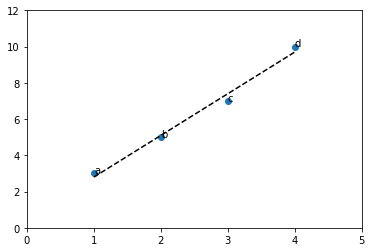

In [6]:
# https://stackoverflow.com/questions/6148207/linear-regression-with-matplotlib-numpy

import numpy as np
import matplotlib.pyplot as plt

x = [1,2,3,4]
y = [3,5,7,10] # 10, not 9, so the fit isn't perfect

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 
# poly1d_fn is now a function which takes in x and returns an estimate for y

plt.scatter(x, y)
plt.plot(x, poly1d_fn(x), '--k')
labels = 'a', 'b', 'c', 'd'
for label, x, y in zip(labels, x, y):
    plt.annotate(label, xy=(x, y))
plt.xlim(0, 5)
plt.ylim(0, 12)

## Example Generator

Calling the following function does not require entire contents of file (or even entire column) to be read into memory; instead, calorie value is read as needed.

In [14]:
# create generator function to read in 
# calorie column
def get_calories():
    with open('starbucks_drinkMenu_expanded.csv', 'r') as f:
        next(f)
        for line in f:
            line_parts = line.split(',')
            yield int(line_parts[3])


## Descriptive Statistics

### Max, Min, and Len

It may be useful to describe a data set by:

* the number of data points
* the highest and lowest value

There are built in functions in Python to do this, like `max`, `min`, and `len`

In [15]:
# max and min can actually take a generator 
max(get_calories())

510

In [8]:
min(get_calories())

0

A generator is not actually a _collection_ of elements, so you can't use `len` on it. Instead, you'll have to turn your generator into a collection...

In [9]:
# if we want to work with all values from our generator, we can convert to a list 
# (that means all values are in memory, tho)
calories = list(get_calories())

In [16]:
# now it's possible to get the length of our data set
len(calories)

242

In [18]:
# because it's a list we can view the first 10 values with slicing
calories[:10]

[3, 4, 5, 5, 70, 100, 70, 100, 150, 110]

In [19]:
# ...and the last 10 values
calories[-10:]

[230, 260, 240, 310, 350, 320, 170, 200, 180, 240]

### Central Tendency

Two methods of determining where our data set is centered are:

1. mean
2. median

In [5]:
mean = lambda li: sum(li) / len(li)
mean([1, 2, 3, 4, 5])

3.0

In [9]:
def median(li):
    li.sort()
    i = len(li) // 2
    if len(li) % 2 == 1:
        ret =  li[i]
    else:
        ret = mean(li[i - 1:i + 1])
    return ret

print(median([1, 2, 3, 4, 5]))
print(median([1, 2, 3, 5, 6, 7]))

3
4.0


In [12]:
from collections import Counter
def mode(li):
    counts = Counter(li)
    return counts.most_common(1)[0][0]
    
mode([1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 5, 5, 6, 7])

3

In [11]:
# calculating the mean
sum(calories) / len(calories)

193.87190082644628

In [22]:
# if we need the median, we'll have to sort first
sorted_calories = sorted(calories)

In [23]:
# calculating the median
# if there is an even number of elements, we'll have to take average of middle two

def median(d):
    middle_index = len(d) // 2
    if len(d) % 2 == 0:
        return (d[middle_index] + d[middle_index + 1]) / 2
    else: 
        return d[middle_index]


In [24]:
median(sorted_calories)

190.0

In [32]:
# note that outliers may not affect the median, whereas they can throw off the mean!

copy_sorted_calories = sorted_calories[:]

# change the last value...
copy_sorted_calories[-1] = 200000

In [33]:
sum(copy_sorted_calories) / len(copy_sorted_calories)

1018.2107438016529

In [34]:
median(copy_sorted_calories)

190.0

In [91]:
# otoh adding / removing several values that aren't outliers may make the median jump, 
# whereas the mean may only change slightly

In [92]:
copy_sorted_calories = [150] * 20 + sorted_calories[:]

In [93]:
sum(copy_sorted_calories) / len(copy_sorted_calories)

190.5229007633588

In [94]:
median(copy_sorted_calories)

180.0

In [95]:
# note that there are so many values that are 190 above that it's tough to change
# that without adding several values like we did above
sorted_calories.count(190)

11

In [7]:
f = open('GLB.Ts+dSST.txt', 'r') 

In [8]:
lines = f.readlines()    

In [10]:
print(''.join(lines[:10]))

        GLOBAL Land-Ocean Temperature Index in 0.01 degrees Celsius   base period: 1951-1980

                    sources:  GHCN-v4 1880-12/2019 + SST: ERSST v5 1880-12/2019
                    using elimination of outliers and homogeneity adjustment
                    Notes: 1950 DJF = Dec 1949 - Feb 1950 ;  ***** = missing

                                                                     AnnMean
Year   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec    J-D D-N    DJF  MAM  JJA  SON  Year
1880   -17  -23   -8  -15   -9  -20  -17   -9  -14  -22  -21  -16    -16 ***   ****  -11  -15  -19  1880
1881   -18  -13    4    6    7  -17    1   -2  -14  -20  -17   -6     -7  -8    -16    6   -6  -17  1881



In [11]:
print(''.join(lines[-10:]))

2017   103  114  116   94   90   72   82   87   79   90   88   95     92  92    101  100   80   86  2017
2018    82   85   90   90   82   78   82   77   80  101   83   92     85  85     87   87   79   88  2018
2019    93   95  118  102   86   92   94   94   92  102  100  111     98  97     93  102   93   98  2019
Year   Jan  Feb  Mar  Apr  May  Jun  Jul  Aug  Sep  Oct  Nov  Dec    J-D D-N    DJF  MAM  JJA  SON  Year

Divide by 100 to get changes in degrees Celsius (deg-C).
Multiply that result by 1.8(=9/5) to get changes in degrees Fahrenheit (deg-F).

Example      --      Table Value :      40
                          change :    0.40 deg-C  or  0.72 deg-F


In [20]:
def get_temps():
    f = open('GLB.Ts+dSST.txt', 'r') 
    startIndex = None
    endIndex = None
    for line in f:
        parts = line.split()
        if len(parts) > 0:
            if parts[0] == 'Year' and startIndex == None and endIndex == None:
                try:
                    startIndex = parts.index('Jan')
                    endIndex = parts.index('Dec')
                except IndexError:
                    continue
            elif parts[0].isnumeric() and len(parts[0]) == 4 and startIndex and endIndex:
                try:
                    yield int(parts[0]), [int(n) for n in parts[startIndex:endIndex + 1]]
                except ValueError:
                    continue
            
    
    

In [21]:
for t in get_temps():
    print(t)

(1880, [-17, -23, -8, -15, -9, -20, -17, -9, -14, -22, -21, -16])
(1881, [-18, -13, 4, 6, 7, -17, 1, -2, -14, -20, -17, -6])
(1882, [18, 15, 6, -15, -14, -22, -15, -6, -14, -23, -15, -35])
(1883, [-28, -36, -12, -18, -17, -6, -7, -13, -21, -11, -23, -10])
(1884, [-12, -8, -36, -39, -34, -34, -32, -27, -27, -24, -32, -30])
(1885, [-57, -32, -25, -41, -44, -42, -32, -29, -27, -22, -22, -8])
(1886, [-41, -49, -41, -27, -23, -33, -17, -29, -22, -26, -25, -23])
(1887, [-70, -55, -34, -33, -29, -23, -24, -33, -24, -34, -24, -32])
(1888, [-32, -34, -39, -19, -21, -16, -9, -14, -11, 3, 5, -3])
(1889, [-7, 19, 7, 11, 0, -9, -6, -19, -23, -24, -32, -28])
(1890, [-41, -45, -39, -28, -39, -23, -27, -38, -35, -24, -43, -30])
(1891, [-32, -46, -17, -26, -15, -20, -17, -16, -15, -21, -30, -3])
(1892, [-27, -9, -39, -32, -23, -21, -31, -26, -15, -13, -41, -37])
(1893, [-80, -55, -21, -26, -34, -25, -13, -24, -22, -18, -18, -31])
(1894, [-51, -28, -22, -44, -30, -39, -23, -23, -27, -22, -24, -20])
(189

In [24]:
max(get_temps(), key=lambda t: t[1][0])

(2016, [117, 137, 136, 112, 96, 82, 84, 101, 91, 88, 91, 86])